# **종합실습 단변량 분석**

## **1.비즈니스 시나리오**

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
>
* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


## **2.환경준비**

### **(1) 라이브러리 불러오기**

In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **(2) 데이터 로딩 : 카시트 판매량 데이터**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	**Sales** 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	**CompPrice** 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	**Income** 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	**Advertising** 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	**Population** 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	**Price** 	|	 자사 지역별 판매가격	|	feature	|
|	**ShelveLoc** 	|	 진열상태	|	feature	|
|	**Age** 	|	 지역 인구의 평균 연령	|	feature	|
|	**Urban** 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	**US** 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [156]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


## **3.단변량분석 : 숫자형 변수**

* 숫자형변수를 분석하는 함수를 생성합시다.

In [159]:
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

### **(1) Sales (Target)**

In [161]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


<< 그래프 >>


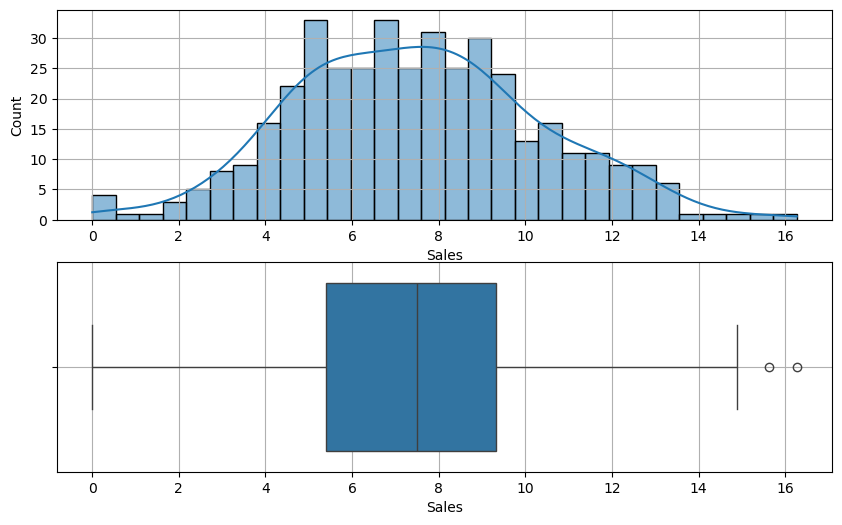

In [165]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

4) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

### **(2) CompPrice**

In [171]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

In [173]:
# 경쟁사의 가격

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


<< 그래프 >>


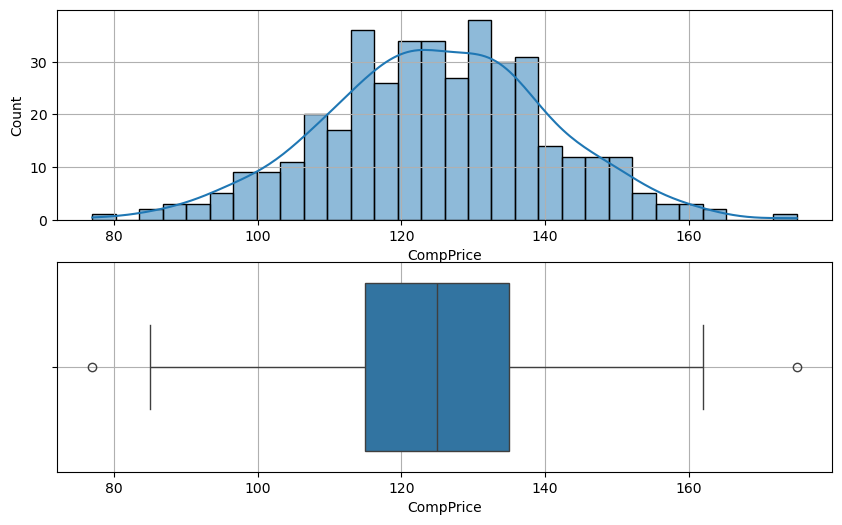

In [175]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [177]:
# 경쟁사의 가격은 110~135정도에 대부분 분포함

4) 추가 분석해 볼 사항이 있나요?

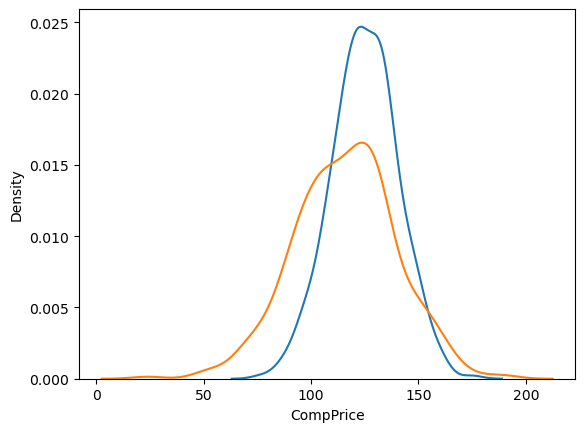

In [179]:
#  경쟁사 가격 vs 자사 가격의 비교

sns.kdeplot(x='CompPrice' , data=data)

sns.kdeplot(x='Price' , data=data)

plt.show()

### **(3) Income**

In [181]:
var = 'Income'

1) 변수의 비즈니스 의미

In [183]:
# 지역 편균소득

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


<< 그래프 >>


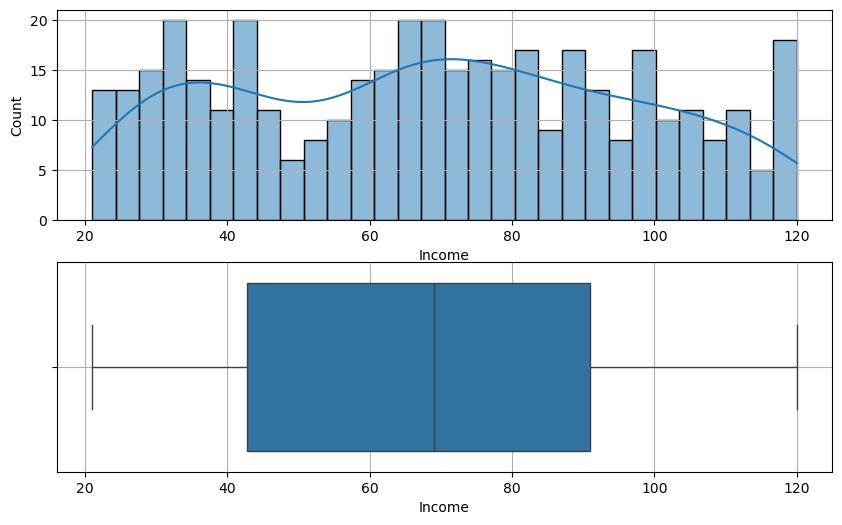

In [185]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [187]:
# 다양한 번위에서 골고루 분포함

4) 추가 분석해 볼 사항이 있나요?

In [189]:
#평균소득, 최소소득, 최고소득일때 값을 분석

### **(4) Advertising**

In [191]:
var = 'Advertising'

1) 변수의 비즈니스 의미

In [193]:
#각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


<< 그래프 >>


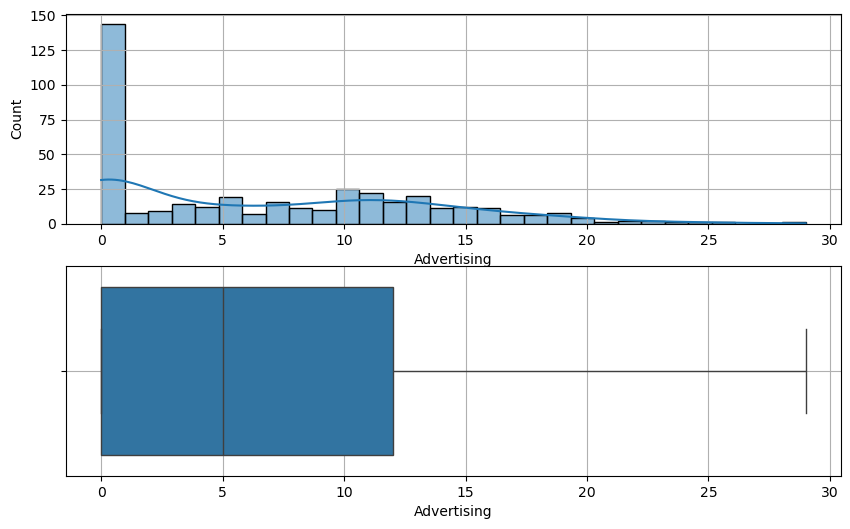

In [195]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [197]:
# 0에 많은 데이터가 몰려 있음

4) 추가 분석해 볼 사항이 있나요?

### **(5) Population**

In [200]:
var = 'Population'

1) 변수의 비즈니스 의미

In [202]:
#지역 인구수(단위 : 1000명)

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


<< 그래프 >>


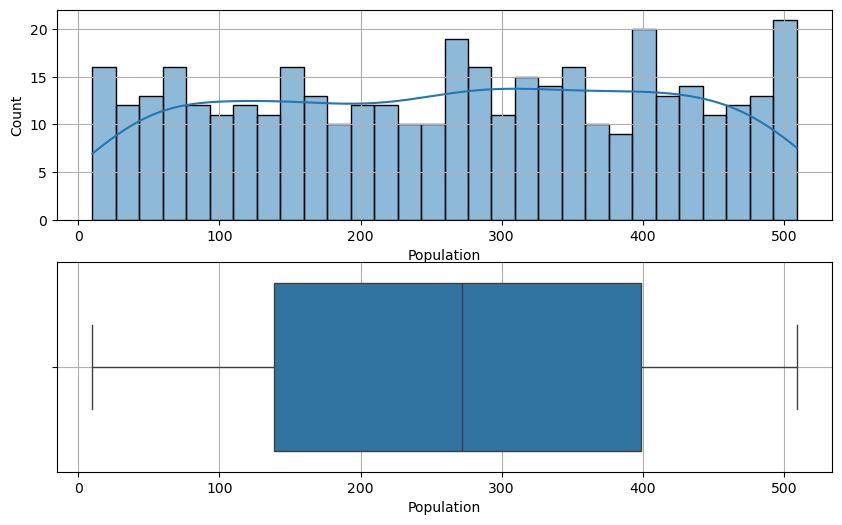

In [204]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [206]:
# 100~400의 사이에 많은 데이터 분포 

4) 추가 분석해 볼 사항이 있나요?

In [208]:
# 지역인구수가 많은 지역과 적은 지역간의 차이

### **(6) Price**

In [210]:
var = 'Price'

1) 변수의 비즈니스 의미

In [212]:
#자사 지역별 판매가격

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


<< 그래프 >>


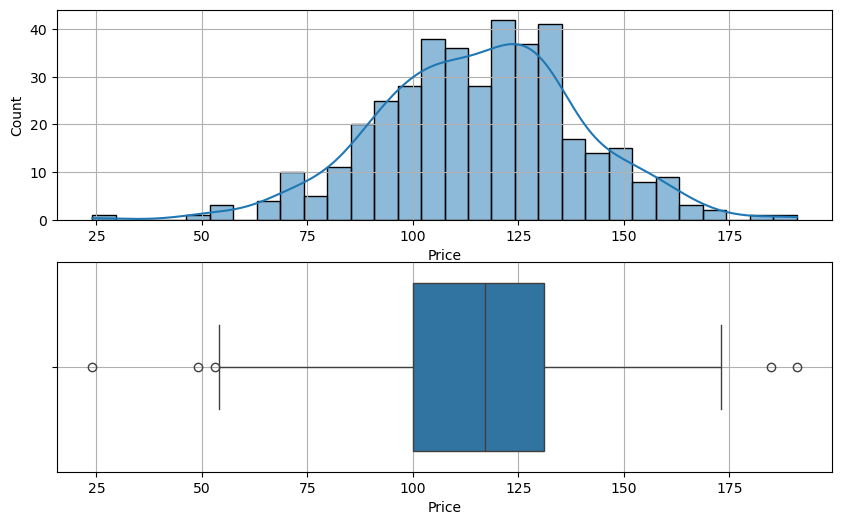

In [214]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [216]:
# 100에서 130정도에 많은 데이터 집중

4) 추가 분석해 볼 사항이 있나요?

In [218]:
#이상치값에서 분석결과

### **(7) Age**

In [220]:
var ='Age'

1) 변수의 비즈니스 의미

In [222]:
#지역 인구의 평균 연령

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


<< 그래프 >>


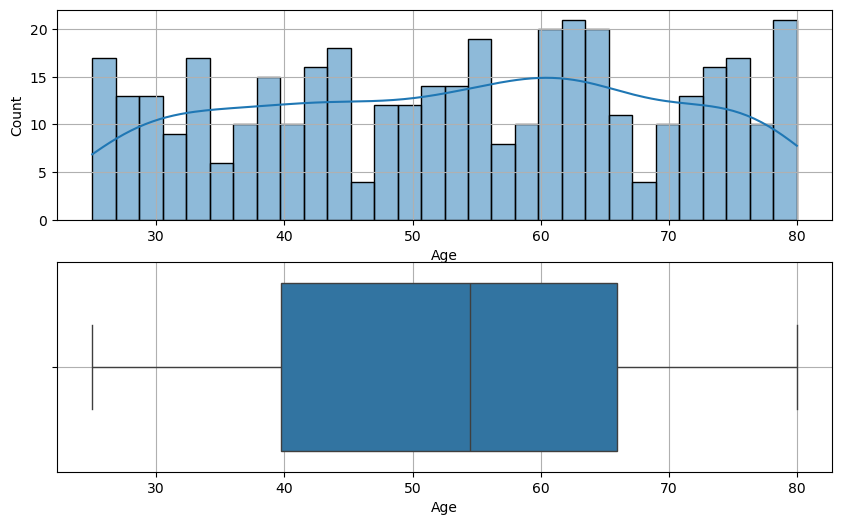

In [224]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [226]:
#평균 연령대의 수

4) 추가 분석해 볼 사항이 있나요?

In [228]:
# 노인인구가 많은지, 젊은층이많은지

## **4.단변량분석 : 범주형 변수**

* 함수 생성

In [231]:
def eda_1_cat(data, var) :
    t1 = data[var].value_counts()
    t2 = data[var].value_counts(normalize = True)
    t3 = pd.concat([t1, t2], axis = 1)
    t3.columns = ['count','ratio']
    display(t3)
    sns.countplot(x = var, data = data)
    plt.show()
    

### **(1) ShelveLoc**

In [233]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

,count,ratio
ShelveLoc,,
Medium,219,0.5475
Bad,96,0.2400
Good,85,0.2125


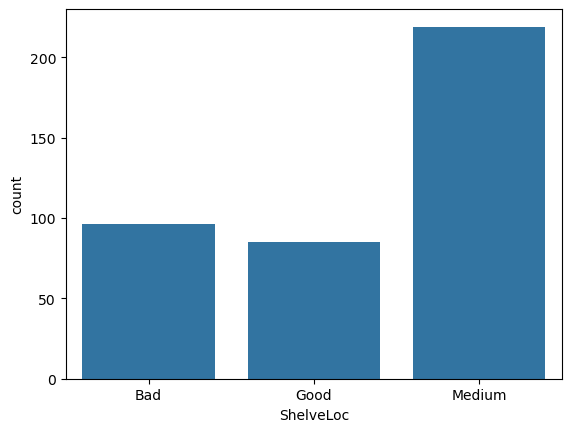

In [237]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

4) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

### **(2) Urban**

In [243]:
var='Urban'

1) 변수의 비즈니스 의미

In [245]:
# 도심 지역 여부(Yes,No)

2) 기초통계량(수치화)

,count,ratio
Urban,,
Yes,282,0.705
No,118,0.295


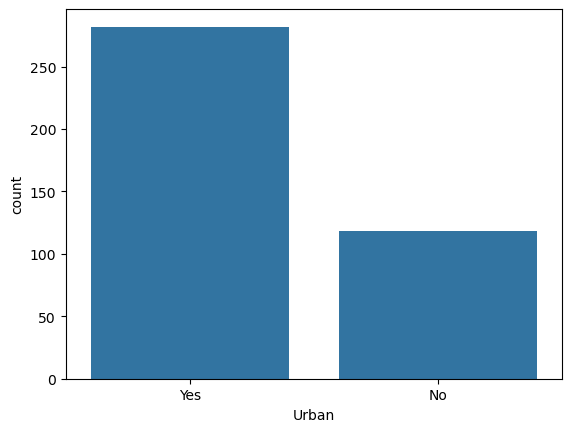

In [247]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [249]:
# 도심지역이 아닌 지역보다 수가 많음

4) 추가 분석해 볼 사항이 있나요?

In [251]:
#도심지역을 결정짓는 요소는 무엇인지?

### **(3) US**

In [253]:
var='US'

1) 변수의 비즈니스 의미

In [255]:
# 매장이 미국에 있는지 여부(Yes,No)

2) 기초통계량(수치화)

,count,ratio
US,,
Yes,258,0.645
No,142,0.355


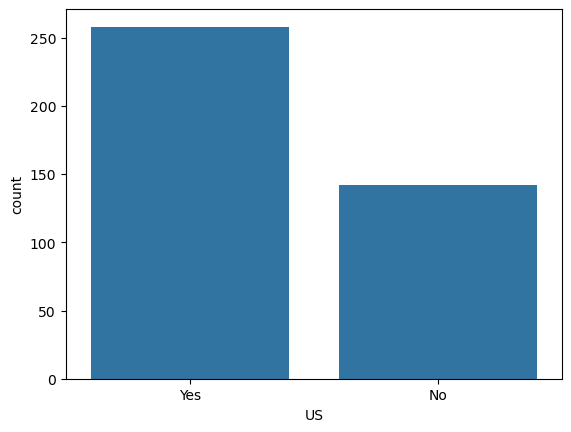

In [257]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [259]:
# 미국에 있는 매장이 그렇지 않은 매장보다 많음

4) 추가 분석해 볼 사항이 있나요?

In [261]:
# 미국 내 매장이 다른 매장보다 매출이 큰지?